In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/home/tsuman/Program_Files/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
tf.reset_default_graph() 

In [5]:
# DEFINE parameters
num_inputs = 10
neurons_hid1 = 5
neurons_hid2 = 3
neurons_hid3 = 1

learning_rate = 0.003

In [6]:
# PINV(PSEUDO-INVERSE) function
def pinv(a, rcond=1e-15):
    s, u, v = tf.svd(a)
    # Ignore singular values close to zero to prevent numerical overflow
    limit = rcond * tf.reduce_max(s)
    non_zero = tf.greater(s, limit)

    reciprocal = tf.where(non_zero, tf.reciprocal(s), tf.zeros(s.shape))
    lhs = tf.matmul(v, tf.diag(reciprocal))
    return tf.matmul(lhs, u, transpose_b=True)

In [7]:
# TRANSPOSE OR PINV
tie_weight = tf.transpose #pinv

In [8]:
## PLACEHOLDER DEFINATION
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [9]:
## WEIGHTS DEFINATION
initializer = tf.variance_scaling_initializer()

w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
w1_ = tie_weight(w1)

In [10]:
'''
## WEIGHTS DEFINATION
initializer = tf.variance_scaling_initializer()

w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
# w1 = tf.Variable(np.load('./save/weights/lw1.npy'))
w1_ = tie_weight(w1)

w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]), dtype=tf.float32)
w2_ = tie_weight(w2)

# LAYER MODELING OF :NN
hid_layer1 = act_func(tf.matmul(X, w1))

# hid_layer2 = act_func(tf.matmul(hid_layer1, w2))

# hid_layer1_= act_func(tf.matmul(hid_layer2, w2_))
output_layer = (tf.matmul(hid_layer1, w1_))
'''

"\n## WEIGHTS DEFINATION\ninitializer = tf.variance_scaling_initializer()\n\nw1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)\n# w1 = tf.Variable(np.load('./save/weights/lw1.npy'))\nw1_ = tie_weight(w1)\n\nw2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]), dtype=tf.float32)\nw2_ = tie_weight(w2)\n\n# LAYER MODELING OF :NN\nhid_layer1 = act_func(tf.matmul(X, w1))\n\n# hid_layer2 = act_func(tf.matmul(hid_layer1, w2))\n\n# hid_layer1_= act_func(tf.matmul(hid_layer2, w2_))\noutput_layer = (tf.matmul(hid_layer1, w1_))\n"

In [28]:
# ACTIVATION FUNCTION  [ lambda X:X  <OR>  tf.nn.relu  ]
act_func = lambda X:X #tf.nn.relu

In [29]:
# LAYER MODELING OF :NN
hid_layer1 = act_func(tf.matmul(X, w1))
output_layer = tf.nn.softmax(tf.matmul(hid_layer1, w1_))

In [30]:
# LOSS FUNCTIONS
# loss = tf.reduce_mean(tf.square(output_layer - X))
# loss = tf.reduce_mean(tf.abs(output_layer - X))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=X,logits=output_layer))

In [31]:
# TRAINING
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss, var_list=[w1])

In [32]:
# PREPARATION
init = tf.global_variables_initializer()
saver = tf.train.Saver() 

In [33]:
num_epochs = 100
batch_size = 150

try:
    with tf.Session() as sess:
        sess.run(init)

        # Epoch == Entire Training Set
        for epoch in range(num_epochs):
            num_batches = mnist.train.num_examples // batch_size

            # 150 batch size
            for iteration in range(num_batches):
                X_batch, y_batch = mnist.train.next_batch(batch_size)
                sess.run(train, feed_dict={X: y_batch})

            training_loss = loss.eval(feed_dict={X: y_batch})   
            print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
            saver.save(sess, "./save/label_ae_3.ckpt")
            
            
            
except KeyboardInterrupt:
    print('Keyboard Interrupted')
finally:
    print('Finished Training the Model')

Epoch 0 Complete. Training Loss: 1.4862391948699951
Epoch 1 Complete. Training Loss: 1.4661521911621094
Epoch 2 Complete. Training Loss: 1.463252067565918
Epoch 3 Complete. Training Loss: 1.4623050689697266
Epoch 4 Complete. Training Loss: 1.4618703126907349
Epoch 5 Complete. Training Loss: 1.4616217613220215
Epoch 6 Complete. Training Loss: 1.4614803791046143
Epoch 7 Complete. Training Loss: 1.4613920450210571
Epoch 8 Complete. Training Loss: 1.4613291025161743
Epoch 9 Complete. Training Loss: 1.461286187171936
Epoch 10 Complete. Training Loss: 1.4612547159194946
Epoch 11 Complete. Training Loss: 1.4612308740615845
Epoch 12 Complete. Training Loss: 1.461213231086731
Epoch 13 Complete. Training Loss: 1.4611997604370117
Epoch 14 Complete. Training Loss: 1.4611907005310059
Epoch 15 Complete. Training Loss: 1.461181402206421
Epoch 16 Complete. Training Loss: 1.4611760377883911
Epoch 17 Complete. Training Loss: 1.4611706733703613
Epoch 18 Complete. Training Loss: 1.461166501045227
Epoch 19

In [34]:
num_test_labels = 10
start_point = 15
with tf.Session() as sess:
    
    saver.restore(sess,"./save/label_ae_3.ckpt")
    
    results,compressed = sess.run([output_layer, hid_layer1],
                                  feed_dict={X:mnist.test.labels[start_point:num_test_labels+start_point]})
    weight1 = w1.eval()

INFO:tensorflow:Restoring parameters from ./save/label_ae_3.ckpt


In [35]:
results.shape

(10, 10)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


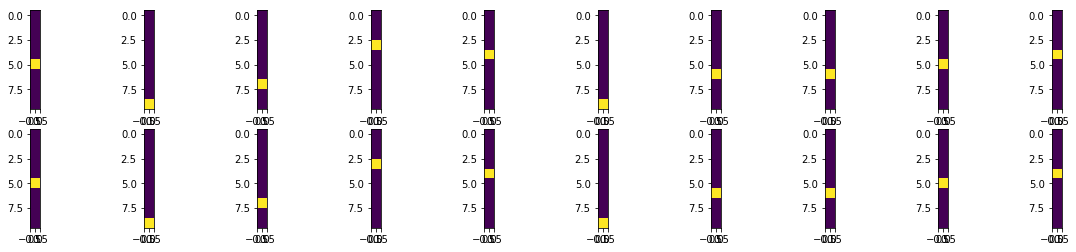

In [36]:
# ORIGINAL VS RECONSTRUCTED
f, a = plt.subplots(2, num_test_labels, figsize=(20, 4))
for i in range(start_point,num_test_labels+start_point):
    j = i-start_point
    a[0][j].imshow(np.reshape(mnist.test.labels[i], (10, 1)))
    a[1][j].imshow(np.reshape(results[j], (10, 1)))
    print(mnist.test.labels[i])
    np.set_printoptions(precision=4, suppress=True)
    print(results[j])

In [38]:
weight1

array([[ 0.6009, -2.3916, -0.7849,  2.6548,  2.2748],
       [ 2.2848,  1.2325,  1.6521,  2.5497, -1.7147],
       [-0.597 ,  2.3952,  0.7842, -2.6543, -2.2742],
       [-2.2769, -1.2249, -1.6487, -2.5467,  1.7102],
       [ 2.5635, -1.9363,  1.7633, -2.1952,  0.4541],
       [ 0.9431, -1.7221, -2.7217, -0.1498, -2.829 ],
       [-2.5615,  1.942 , -1.7637,  2.195 , -0.4556],
       [ 2.3994,  2.2183, -2.264 , -0.6344,  1.6576],
       [-2.3946, -2.2115,  2.2628,  0.6323, -1.6581],
       [-0.9423,  1.733 ,  2.7275,  0.1485,  2.8345]], dtype=float32)

In [39]:
print(weight1.shape)
np.save('./save/weights/lw1.npy',weight1)
#wt1 = np.load('./save/weights/w1.npy')

(10, 5)
